## Collatz alpha experiments

In [57]:
"""
This experimental notebook analyses alphas (number of divisions by two) 
of randomly generated Collatz sequences.
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
import random as rnd
from math import log2
import matplotlib.pyplot as plt
import pandas as pd
from collatz import generator as gen
from collatz import commons as com

# Configuration
MAX_VALUE = 101
K_FACTOR = 3
MAX_ITERATIONS = 100
LOG_MODE = None
PRINT_TABLE = True

START_VALUE = rnd.randint(1, MAX_VALUE)

if START_VALUE % 2 == 0:
    START_VALUE = START_VALUE + 1

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Generate Collatz sequence
analysis_frame = gen.generate_odd_collatz_sequence(
    start_value=START_VALUE, k=K_FACTOR, max_iterations=MAX_ITERATIONS)

# Drop last row
analysis_frame = analysis_frame[:-1]

# Derive new fields
analysis_frame["v_1"] = START_VALUE
analysis_frame["n"] = analysis_frame.index + 1

analysis_frame["alpha_i"] = analysis_frame["next_collatz"].apply(com.trailing_zeros)
analysis_frame["alpha_i"] = analysis_frame["alpha_i"].astype("int64")
analysis_frame["alpha_i_max"] = log2(K_FACTOR) + analysis_frame["collatz"].apply(log2)
analysis_frame["alpha_i_max"] += (1 + 1/(K_FACTOR * analysis_frame["collatz"])).apply(log2)
# Round result here to avoid loss of precision errors
analysis_frame["alpha_i_max"] = analysis_frame["alpha_i_max"].round(9)
analysis_frame["alpha_sum"] = analysis_frame["alpha_i"].cumsum()
analysis_frame["alpha_cycle"] = (log2(K_FACTOR) * analysis_frame["n"]).astype('int64') + 1
analysis_frame["alpha_max"] = \
    log2(START_VALUE) + (analysis_frame["n"] * log2(K_FACTOR))
analysis_frame["alpha_max"] = analysis_frame["alpha_max"].astype('int64') + 1

analysis_frame["bin_str"] = analysis_frame["collatz"].apply(com.to_binary)

# Possibly set log mode
if LOG_MODE:
    analysis_frame["v_1"] = analysis_frame["v1"].apply(LOG_MODE)
    analysis_frame["collatz"] = analysis_frame["collatz"].apply(LOG_MODE)
    analysis_frame["next_odd"] = analysis_frame["next_odd"].apply(LOG_MODE)
    
# Validate alpha max & alpha pred
final_alpha = analysis_frame["alpha_sum"].max()
final_alpha_max = analysis_frame["alpha_max"].max()

alpha_max_valid = final_alpha == final_alpha_max
alpha_i_max_valid = int((analysis_frame["alpha_i"] <= analysis_frame["alpha_i_max"]).sum())

alphas_valid = alpha_max_valid and alpha_i_max_valid

# Print results
print_frame = analysis_frame[[
    "n", "v_1", "collatz", "next_odd",
    "alpha_i", "alpha_i_max", "alpha_sum", "alpha_cycle", 
    "alpha_max", "bin_str"]]

print_frame.columns = [
    "n","v_1", "v_i", "v_i+1",
    "a_i", "a_i_max", "a_sum", "a_cycle", "a_max",
    "bin_str"]

print_frame = print_frame.reset_index(drop=True)

print("Start value:", START_VALUE, 
      " K:", K_FACTOR, 
       "Alphas valid:", alpha_max_valid, "\n")

if PRINT_TABLE:
    print(print_frame.to_string(index=False), "\n")


Start value: 51  K: 3 Alphas valid: True 

 n  v_1  v_i  v_i+1  a_i   a_i_max  a_sum  a_cycle  a_max  bin_str
 1   51   51     77    1  7.266787      1        2      8   110011
 2   51   77     29    3  7.857981      4        4      9  1001101
 3   51   29     11    3  6.459432      7        5     11    11101
 4   51   11     17    1  5.087463      8        7     13     1011
 5   51   17     13    2  5.700440     10        8     14    10001
 6   51   13      5    3  5.321928     13       10     16     1101
 7   51    5      1    4  4.000000     17       12     17      101 



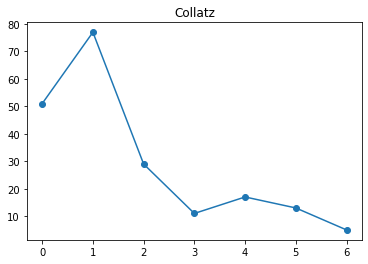

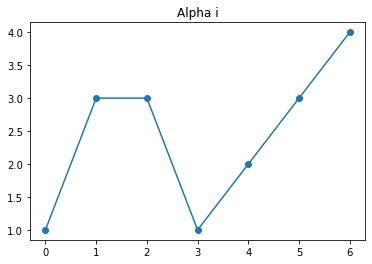

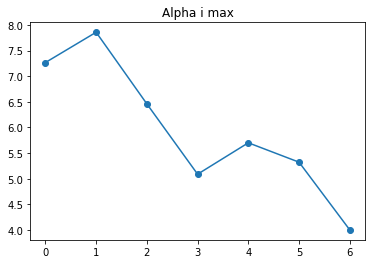

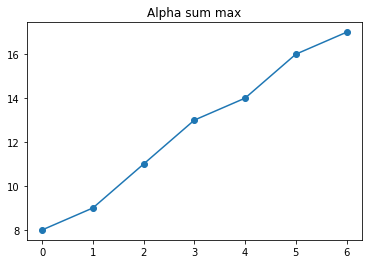

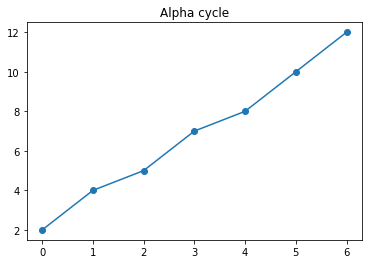

In [58]:
# Plot results
plt.figure()
plt.title("Collatz")
plt.plot(print_frame["v_i"],  "o-")


plt.figure()
plt.title("Alpha i")
plt.plot(print_frame["a_i"],  "o-")

plt.figure()
plt.title("Alpha i max")
plt.plot(print_frame["a_i_max"],  "o-")

plt.figure()
plt.title("Alpha sum max")
plt.plot(print_frame["a_max"],  "o-")

plt.figure()
plt.title("Alpha cycle")
plt.plot(print_frame["a_cycle"],  "o-")
plt.show()
